In [19]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
path = './data/'
labels = os.listdir(path)

In [4]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(path + label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

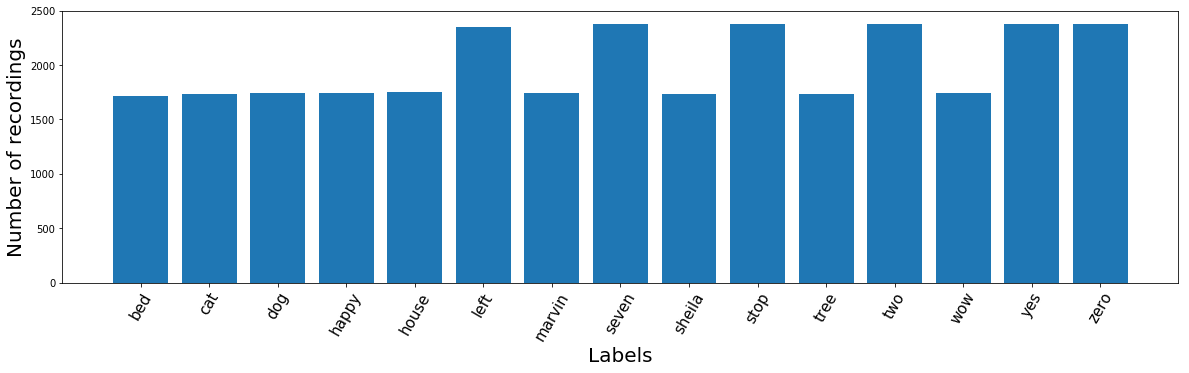

In [5]:
plt.figure(figsize=(20,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Labels', fontsize=20)
plt.ylabel('Number of recordings', fontsize=20)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.show()

In [20]:
audio, sample_rate = librosa.load(path + '/bed/00176480_nohash_0.wav', sr = 16000)

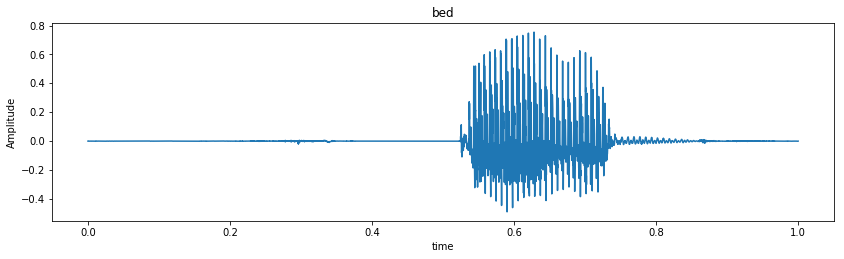

In [18]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('bed')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(audio), sample_rate), audio)

In [17]:
ipd.Audio(audio, rate=sample_rate)

# Neural Network

In [11]:
import wandb
from preprocess import *
wandb.init(project="speech-recognition")
config = wandb.config
config.max_len = 11
config.buckets = 20

In [9]:
def wav2mfcc(file_path, n_mfcc=20, max_len=11):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = np.asfortranarray(wave[::3])
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

In [10]:
pd.DataFrame(wav2mfcc('./data/bed/19f9c115_nohash_3.wav'))

,0,1,2,3,4,5,6,7,8,9,10
0,-361.992615,-405.032532,-475.916138,-474.601990,-219.070480,-126.130203,-110.430977,-116.034714,-174.682404,-289.293854,-397.126434
1,-7.637213,9.353251,42.000008,46.531158,-1.405969,-33.400826,-63.382504,-54.208649,-12.167704,40.837433,44.729530
2,-24.234180,-15.422884,3.619861,4.348600,-59.652428,-61.829826,-60.735481,-57.085793,-54.226746,-46.676994,-17.773731
3,40.104313,38.911865,31.736929,27.395123,-33.264832,-32.979980,-16.765451,-26.616055,-40.216705,-21.145844,14.714356
4,25.392010,24.452545,21.378672,21.765610,36.428406,36.001221,37.056084,28.337475,27.251358,18.827328,23.066151
5,15.977909,14.637233,10.945372,9.916015,2.611271,-3.192318,-7.471964,-4.011388,-5.241780,-12.166206,-1.595258
6,-6.490936,-4.946122,-1.252912,1.259649,-33.483894,-33.408649,-38.812881,-35.919350,-28.600630,-17.644415,-7.998960
7,-0.035998,-1.053053,-2.966421,0.803960,18.655209,20.120529,12.922794,3.066458,1.023172,-0.859061,1.314217
8,-20.433775,-17.959461,-6.152930,-0.006574,13.367506,12.462053,8.854969,-5.131057,-1.511046,-12.831343,-12.740799
9,-2.187109,-2.966935,-4.177238,0.965661,18.014763,23.689003,28.637028,14.016478,14.406263,19.055923,14.605883


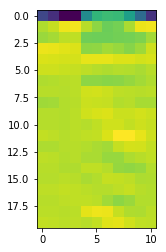

In [11]:
plt.imshow(wav2mfcc('./data/bed/19f9c115_nohash_3.wav'))

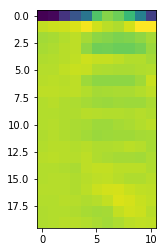

In [12]:
plt.imshow(wav2mfcc('./data/bed/00176480_nohash_0.wav'))

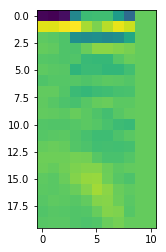

In [13]:
plt.imshow(wav2mfcc('./data/wow/06076b6b_nohash_0.wav'))

In [12]:
from tqdm import tqdm
for label in labels:
    # Init mfcc vectors
    mfcc_vectors = []
    wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + label)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
        mfcc = wav2mfcc(wavfile, max_len=config.max_len, n_mfcc=config.buckets)
        mfcc_vectors.append(mfcc)
    np.save(label + '.npy', mfcc_vectors)

Saving vectors of label - 'zero': 100%|████████████████████████████████████████████| 2376/2376 [00:35<00:00, 68.11it/s]


In [17]:
from sklearn.model_selection import train_test_split
def get_train_test(split_ratio=0.6, random_state=42):
    labels, indices, _ = get_labels(path)

    X = np.load(labels[0] + '.npy')
    y = np.zeros(X.shape[0])

    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [18]:
X_train, X_test, y_train, y_test = get_train_test()

In [19]:
channels = 1
config.epochs = 30
config.batch_size = 100
num_classes = len(labels)

In [20]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

# Models

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM, Convolution2D
from keras.utils import to_categorical
from wandb.keras import WandbCallback

In [23]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [24]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

# Perceptron

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [22]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Train on 17926 samples, validate on 11952 samples
Epoch 1/30
17926/17926 [==============================] - ETA: 52s - loss: 123.4092 - accuracy: 0.218 - ETA: 1s - loss: 73.7799 - accuracy: 0.0866  - ETA: 0s - loss: 54.6893 - accuracy: 0.113 - ETA: 0s - loss: 45.5283 - accuracy: 0.139 - ETA: 0s - loss: 39.5380 - accuracy: 0.162 - ETA: 0s - loss: 35.7204 - accuracy: 0.184 - ETA: 0s - loss: 33.6319 - accuracy: 0.194 - ETA: 0s - loss: 32.2244 - accuracy: 0.203 - ETA: 0s - loss: 31.0864 - accuracy: 0.209 - ETA: 0s - loss: 29.3155 - accuracy: 0.220 - ETA: 0s - loss: 27.2484 - accuracy: 0.236 - ETA: 0s - loss: 25.4006 - accuracy: 0.250 - 1s 50us/step - loss: 25.2593 - accuracy: 0.2516 - val_loss: 11.5471 - val_accuracy: 0.3670
Epoch 2/30
17926/17926 [==============================] - ETA: 1s - loss: 13.0124 - accuracy: 0.312 - ETA: 0s - loss: 10.5977 - accuracy: 0.379 - ETA: 0s - loss: 10.1692 - accuracy: 0.389 - ETA: 0s - loss: 10.1376 - accuracy: 0.384 - ETA: 0s - loss: 9.8654 - accuracy: 

Epoch 28/30
17926/17926 [==============================] - ETA: 1s - loss: 2.7128 - accuracy: 0.37 - ETA: 0s - loss: 2.6458 - accuracy: 0.43 - ETA: 0s - loss: 2.7681 - accuracy: 0.43 - ETA: 0s - loss: 2.7013 - accuracy: 0.43 - ETA: 0s - loss: 2.7726 - accuracy: 0.43 - ETA: 0s - loss: 2.7845 - accuracy: 0.43 - ETA: 0s - loss: 2.7619 - accuracy: 0.43 - ETA: 0s - loss: 2.7448 - accuracy: 0.43 - ETA: 0s - loss: 2.7117 - accuracy: 0.43 - ETA: 0s - loss: 2.7215 - accuracy: 0.43 - 1s 40us/step - loss: 2.7251 - accuracy: 0.4379 - val_loss: 3.1817 - val_accuracy: 0.3932
Epoch 29/30
17926/17926 [==============================] - ETA: 1s - loss: 2.8348 - accuracy: 0.31 - ETA: 0s - loss: 2.5881 - accuracy: 0.46 - ETA: 0s - loss: 2.6139 - accuracy: 0.45 - ETA: 0s - loss: 2.6673 - accuracy: 0.44 - ETA: 0s - loss: 2.6816 - accuracy: 0.44 - ETA: 0s - loss: 2.7044 - accuracy: 0.44 - ETA: 0s - loss: 2.7406 - accuracy: 0.43 - ETA: 0s - loss: 2.7420 - accuracy: 0.43 - ETA: 0s - loss: 2.7428 - accuracy: 0.

# Confusion Matrix

In [28]:
y_predict = model.predict(X_test)
np.argmax(y_predict,1)

array([ 0, 11,  9, ..., 13,  3,  5], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
import confusionMatrixChart
cm = confusion_matrix(y_test, np.argmax(y_predict,1))

Confusion matrix, without normalization


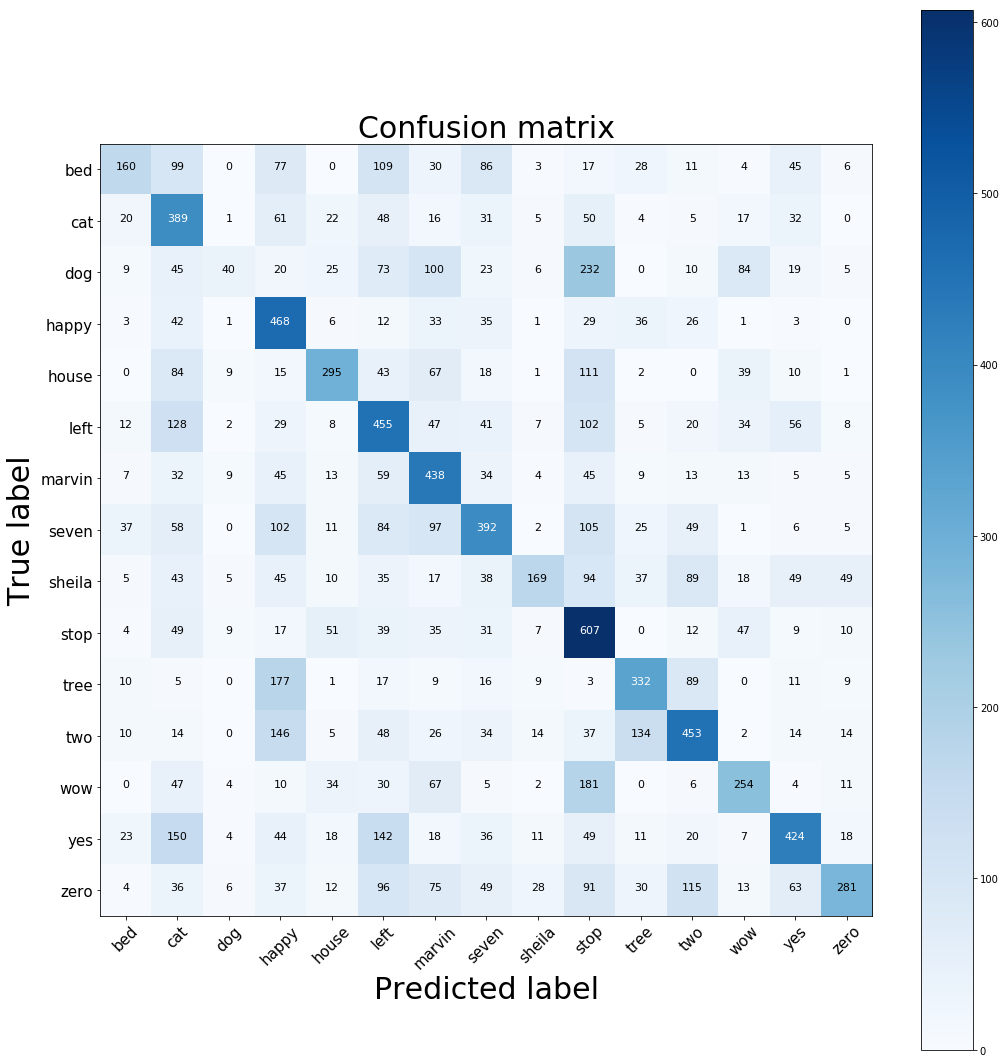

In [30]:
confusionMatrixChart.plot_confusion_matrix(cm,labels, normalize=False)

# one layer convolution

In [28]:
X_train, X_test, y_train, y_test = get_train_test()

In [29]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

In [33]:
model = Sequential()
model.add(
    Conv2D(32, (3, 3), input_shape=(config.buckets, config.max_len, channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [34]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [35]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Train on 17926 samples, validate on 11952 samples
Epoch 1/30
17926/17926 [==============================] - ETA: 1:01 - loss: 25.0242 - accuracy: 0.031 - ETA: 8s - loss: 15.4739 - accuracy: 0.0881  - ETA: 5s - loss: 11.3176 - accuracy: 0.100 - ETA: 4s - loss: 8.8380 - accuracy: 0.112 - ETA: 3s - loss: 7.3386 - accuracy: 0.13 - ETA: 3s - loss: 6.5399 - accuracy: 0.14 - ETA: 2s - loss: 5.9288 - accuracy: 0.16 - ETA: 2s - loss: 5.4903 - accuracy: 0.17 - ETA: 2s - loss: 5.1223 - accuracy: 0.19 - ETA: 2s - loss: 4.8218 - accuracy: 0.20 - ETA: 2s - loss: 4.5959 - accuracy: 0.21 - ETA: 2s - loss: 4.4096 - accuracy: 0.21 - ETA: 2s - loss: 4.2602 - accuracy: 0.23 - ETA: 2s - loss: 4.1534 - accuracy: 0.23 - ETA: 2s - loss: 4.0329 - accuracy: 0.24 - ETA: 2s - loss: 3.9309 - accuracy: 0.24 - ETA: 1s - loss: 3.8281 - accuracy: 0.25 - ETA: 1s - loss: 3.7292 - accuracy: 0.26 - ETA: 1s - loss: 3.6503 - accuracy: 0.26 - ETA: 1s - loss: 3.5829 - accuracy: 0.27 - ETA: 1s - loss: 3.4912 - accuracy: 0.28 -

17926/17926 [==============================] - ETA: 2s - loss: 0.5843 - accuracy: 0.87 - ETA: 2s - loss: 0.4750 - accuracy: 0.86 - ETA: 1s - loss: 0.4537 - accuracy: 0.85 - ETA: 1s - loss: 0.4525 - accuracy: 0.84 - ETA: 1s - loss: 0.4680 - accuracy: 0.84 - ETA: 1s - loss: 0.4808 - accuracy: 0.83 - ETA: 1s - loss: 0.4896 - accuracy: 0.83 - ETA: 1s - loss: 0.4875 - accuracy: 0.83 - ETA: 1s - loss: 0.4775 - accuracy: 0.84 - ETA: 1s - loss: 0.4790 - accuracy: 0.83 - ETA: 1s - loss: 0.4796 - accuracy: 0.83 - ETA: 1s - loss: 0.4786 - accuracy: 0.83 - ETA: 1s - loss: 0.4804 - accuracy: 0.83 - ETA: 1s - loss: 0.4791 - accuracy: 0.84 - ETA: 1s - loss: 0.4815 - accuracy: 0.84 - ETA: 1s - loss: 0.4748 - accuracy: 0.84 - ETA: 1s - loss: 0.4765 - accuracy: 0.84 - ETA: 1s - loss: 0.4765 - accuracy: 0.84 - ETA: 1s - loss: 0.4775 - accuracy: 0.84 - ETA: 1s - loss: 0.4751 - accuracy: 0.84 - ETA: 1s - loss: 0.4767 - accuracy: 0.84 - ETA: 1s - loss: 0.4813 - accuracy: 0.84 - ETA: 1s - loss: 0.4814 - accu

17926/17926 [==============================] - ETA: 2s - loss: 0.1905 - accuracy: 0.93 - ETA: 2s - loss: 0.2784 - accuracy: 0.91 - ETA: 2s - loss: 0.3003 - accuracy: 0.90 - ETA: 2s - loss: 0.3165 - accuracy: 0.90 - ETA: 2s - loss: 0.3147 - accuracy: 0.89 - ETA: 1s - loss: 0.3250 - accuracy: 0.89 - ETA: 1s - loss: 0.3207 - accuracy: 0.89 - ETA: 1s - loss: 0.3212 - accuracy: 0.89 - ETA: 1s - loss: 0.3125 - accuracy: 0.89 - ETA: 1s - loss: 0.3167 - accuracy: 0.89 - ETA: 1s - loss: 0.3224 - accuracy: 0.89 - ETA: 1s - loss: 0.3223 - accuracy: 0.89 - ETA: 1s - loss: 0.3241 - accuracy: 0.89 - ETA: 1s - loss: 0.3227 - accuracy: 0.89 - ETA: 1s - loss: 0.3289 - accuracy: 0.89 - ETA: 1s - loss: 0.3244 - accuracy: 0.89 - ETA: 1s - loss: 0.3229 - accuracy: 0.89 - ETA: 1s - loss: 0.3246 - accuracy: 0.89 - ETA: 1s - loss: 0.3226 - accuracy: 0.89 - ETA: 1s - loss: 0.3209 - accuracy: 0.89 - ETA: 1s - loss: 0.3194 - accuracy: 0.89 - ETA: 1s - loss: 0.3181 - accuracy: 0.89 - ETA: 1s - loss: 0.3163 - accu

17926/17926 [==============================] - ETA: 3s - loss: 0.1358 - accuracy: 0.93 - ETA: 2s - loss: 0.2117 - accuracy: 0.94 - ETA: 2s - loss: 0.2083 - accuracy: 0.93 - ETA: 2s - loss: 0.2056 - accuracy: 0.93 - ETA: 2s - loss: 0.2092 - accuracy: 0.92 - ETA: 2s - loss: 0.2008 - accuracy: 0.92 - ETA: 2s - loss: 0.1969 - accuracy: 0.93 - ETA: 2s - loss: 0.1960 - accuracy: 0.93 - ETA: 2s - loss: 0.1969 - accuracy: 0.93 - ETA: 2s - loss: 0.1965 - accuracy: 0.93 - ETA: 2s - loss: 0.2026 - accuracy: 0.92 - ETA: 2s - loss: 0.2058 - accuracy: 0.92 - ETA: 2s - loss: 0.2037 - accuracy: 0.92 - ETA: 2s - loss: 0.2063 - accuracy: 0.92 - ETA: 2s - loss: 0.2092 - accuracy: 0.92 - ETA: 2s - loss: 0.2089 - accuracy: 0.92 - ETA: 2s - loss: 0.2036 - accuracy: 0.92 - ETA: 2s - loss: 0.1999 - accuracy: 0.92 - ETA: 2s - loss: 0.2042 - accuracy: 0.92 - ETA: 2s - loss: 0.2051 - accuracy: 0.92 - ETA: 2s - loss: 0.2074 - accuracy: 0.92 - ETA: 2s - loss: 0.2076 - accuracy: 0.92 - ETA: 2s - loss: 0.2087 - accu

17926/17926 [==============================] - ETA: 3s - loss: 0.2005 - accuracy: 0.96 - ETA: 2s - loss: 0.1709 - accuracy: 0.94 - ETA: 2s - loss: 0.1434 - accuracy: 0.95 - ETA: 2s - loss: 0.1503 - accuracy: 0.94 - ETA: 1s - loss: 0.1446 - accuracy: 0.95 - ETA: 1s - loss: 0.1476 - accuracy: 0.94 - ETA: 1s - loss: 0.1500 - accuracy: 0.94 - ETA: 1s - loss: 0.1490 - accuracy: 0.94 - ETA: 1s - loss: 0.1515 - accuracy: 0.94 - ETA: 1s - loss: 0.1456 - accuracy: 0.94 - ETA: 1s - loss: 0.1456 - accuracy: 0.94 - ETA: 1s - loss: 0.1425 - accuracy: 0.95 - ETA: 1s - loss: 0.1432 - accuracy: 0.94 - ETA: 1s - loss: 0.1460 - accuracy: 0.94 - ETA: 1s - loss: 0.1494 - accuracy: 0.94 - ETA: 1s - loss: 0.1537 - accuracy: 0.94 - ETA: 1s - loss: 0.1523 - accuracy: 0.94 - ETA: 1s - loss: 0.1536 - accuracy: 0.94 - ETA: 1s - loss: 0.1526 - accuracy: 0.94 - ETA: 1s - loss: 0.1520 - accuracy: 0.94 - ETA: 1s - loss: 0.1519 - accuracy: 0.94 - ETA: 1s - loss: 0.1544 - accuracy: 0.94 - ETA: 1s - loss: 0.1550 - accu

# Confusion Matrix

Confusion matrix, without normalization


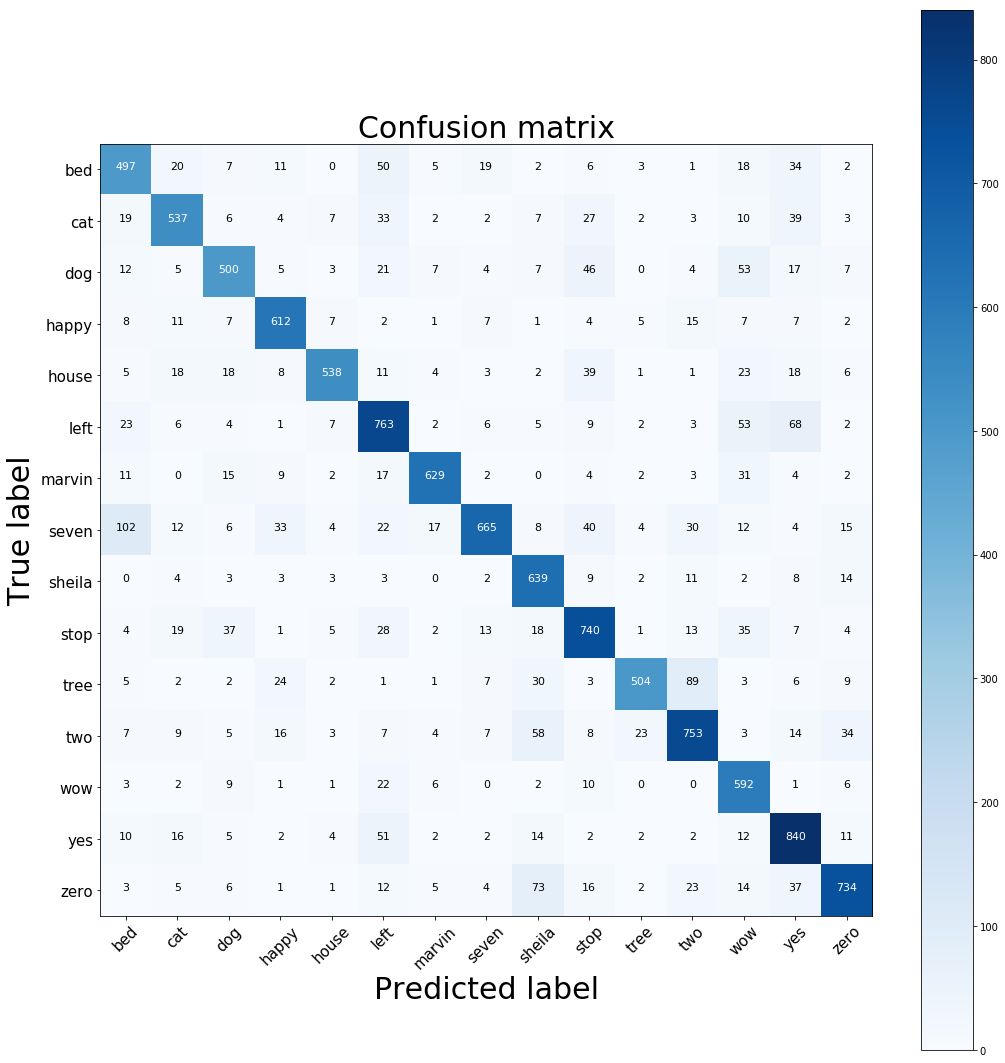

In [36]:
y_predict = model.predict(X_test)
confusionMatrixChart.plot_confusion_matrix(confusion_matrix(y_test, np.argmax(y_predict,1)),labels, normalize=False)

# 2 layer convolution

In [30]:
model = Sequential()
model.add(
    Conv2D(32, (3, 3), input_shape=(config.buckets, config.max_len, channels), activation='relu'))
model.add(
    Conv2D(32, (3, 3), input_shape=(config.buckets, config.max_len, channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [32]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Train on 17926 samples, validate on 11952 samples
Epoch 1/30
17926/17926 [==============================] - ETA: 2:42 - loss: 16.3183 - accuracy: 0.093 - ETA: 38s - loss: 8.6232 - accuracy: 0.0750  - ETA: 20s - loss: 7.2896 - accuracy: 0.065 - ETA: 15s - loss: 6.3921 - accuracy: 0.093 - ETA: 12s - loss: 5.5633 - accuracy: 0.105 - ETA: 11s - loss: 5.1660 - accuracy: 0.099 - ETA: 11s - loss: 4.9098 - accuracy: 0.102 - ETA: 11s - loss: 4.6927 - accuracy: 0.105 - ETA: 10s - loss: 4.4565 - accuracy: 0.108 - ETA: 10s - loss: 4.2648 - accuracy: 0.114 - ETA: 9s - loss: 4.1063 - accuracy: 0.119 - ETA: 9s - loss: 3.9297 - accuracy: 0.12 - ETA: 8s - loss: 3.7919 - accuracy: 0.13 - ETA: 8s - loss: 3.6894 - accuracy: 0.14 - ETA: 8s - loss: 3.5775 - accuracy: 0.14 - ETA: 8s - loss: 3.4806 - accuracy: 0.15 - ETA: 7s - loss: 3.3810 - accuracy: 0.16 - ETA: 7s - loss: 3.2852 - accuracy: 0.17 - ETA: 7s - loss: 3.2021 - accuracy: 0.18 - ETA: 6s - loss: 3.1228 - accuracy: 0.19 - ETA: 6s - loss: 3.0578 - ac

17926/17926 [==============================] - ETA: 5s - loss: 0.8428 - accuracy: 0.75 - ETA: 4s - loss: 0.4902 - accuracy: 0.84 - ETA: 4s - loss: 0.4702 - accuracy: 0.85 - ETA: 4s - loss: 0.5135 - accuracy: 0.83 - ETA: 4s - loss: 0.5303 - accuracy: 0.83 - ETA: 4s - loss: 0.5585 - accuracy: 0.81 - ETA: 4s - loss: 0.5772 - accuracy: 0.81 - ETA: 4s - loss: 0.5635 - accuracy: 0.82 - ETA: 4s - loss: 0.5722 - accuracy: 0.81 - ETA: 4s - loss: 0.5556 - accuracy: 0.82 - ETA: 4s - loss: 0.5445 - accuracy: 0.82 - ETA: 3s - loss: 0.5545 - accuracy: 0.82 - ETA: 3s - loss: 0.5543 - accuracy: 0.82 - ETA: 3s - loss: 0.5406 - accuracy: 0.82 - ETA: 3s - loss: 0.5378 - accuracy: 0.83 - ETA: 3s - loss: 0.5418 - accuracy: 0.82 - ETA: 3s - loss: 0.5398 - accuracy: 0.82 - ETA: 3s - loss: 0.5347 - accuracy: 0.83 - ETA: 3s - loss: 0.5346 - accuracy: 0.83 - ETA: 3s - loss: 0.5437 - accuracy: 0.83 - ETA: 3s - loss: 0.5430 - accuracy: 0.83 - ETA: 3s - loss: 0.5418 - accuracy: 0.83 - ETA: 3s - loss: 0.5405 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.2927 - accuracy: 0.93 - ETA: 6s - loss: 0.3604 - accuracy: 0.89 - ETA: 6s - loss: 0.3196 - accuracy: 0.90 - ETA: 6s - loss: 0.2869 - accuracy: 0.91 - ETA: 6s - loss: 0.2867 - accuracy: 0.91 - ETA: 6s - loss: 0.2904 - accuracy: 0.91 - ETA: 6s - loss: 0.3090 - accuracy: 0.90 - ETA: 6s - loss: 0.3001 - accuracy: 0.91 - ETA: 6s - loss: 0.2934 - accuracy: 0.91 - ETA: 6s - loss: 0.2860 - accuracy: 0.91 - ETA: 6s - loss: 0.2858 - accuracy: 0.91 - ETA: 6s - loss: 0.2768 - accuracy: 0.91 - ETA: 6s - loss: 0.2690 - accuracy: 0.92 - ETA: 6s - loss: 0.2685 - accuracy: 0.92 - ETA: 6s - loss: 0.2668 - accuracy: 0.92 - ETA: 5s - loss: 0.2689 - accuracy: 0.91 - ETA: 5s - loss: 0.2714 - accuracy: 0.91 - ETA: 5s - loss: 0.2688 - accuracy: 0.91 - ETA: 5s - loss: 0.2666 - accuracy: 0.91 - ETA: 5s - loss: 0.2720 - accuracy: 0.91 - ETA: 5s - loss: 0.2739 - accuracy: 0.91 - ETA: 5s - loss: 0.2716 - accuracy: 0.91 - ETA: 5s - loss: 0.2723 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.1113 - accuracy: 1.00 - ETA: 5s - loss: 0.1639 - accuracy: 0.96 - ETA: 5s - loss: 0.1683 - accuracy: 0.95 - ETA: 5s - loss: 0.1582 - accuracy: 0.95 - ETA: 5s - loss: 0.1485 - accuracy: 0.95 - ETA: 5s - loss: 0.1559 - accuracy: 0.95 - ETA: 5s - loss: 0.1617 - accuracy: 0.95 - ETA: 5s - loss: 0.1649 - accuracy: 0.95 - ETA: 5s - loss: 0.1619 - accuracy: 0.95 - ETA: 6s - loss: 0.1616 - accuracy: 0.95 - ETA: 6s - loss: 0.1583 - accuracy: 0.95 - ETA: 6s - loss: 0.1588 - accuracy: 0.94 - ETA: 6s - loss: 0.1565 - accuracy: 0.94 - ETA: 6s - loss: 0.1547 - accuracy: 0.94 - ETA: 6s - loss: 0.1544 - accuracy: 0.94 - ETA: 6s - loss: 0.1526 - accuracy: 0.95 - ETA: 6s - loss: 0.1550 - accuracy: 0.94 - ETA: 6s - loss: 0.1503 - accuracy: 0.95 - ETA: 6s - loss: 0.1488 - accuracy: 0.95 - ETA: 6s - loss: 0.1471 - accuracy: 0.95 - ETA: 6s - loss: 0.1436 - accuracy: 0.95 - ETA: 6s - loss: 0.1440 - accuracy: 0.95 - ETA: 6s - loss: 0.1434 - accu

17926/17926 [==============================] - ETA: 7s - loss: 0.0069 - accuracy: 1.00 - ETA: 5s - loss: 0.1247 - accuracy: 0.96 - ETA: 5s - loss: 0.1312 - accuracy: 0.96 - ETA: 5s - loss: 0.1097 - accuracy: 0.96 - ETA: 4s - loss: 0.1155 - accuracy: 0.96 - ETA: 4s - loss: 0.1142 - accuracy: 0.96 - ETA: 4s - loss: 0.1217 - accuracy: 0.96 - ETA: 4s - loss: 0.1167 - accuracy: 0.96 - ETA: 4s - loss: 0.1141 - accuracy: 0.96 - ETA: 4s - loss: 0.1126 - accuracy: 0.96 - ETA: 4s - loss: 0.1113 - accuracy: 0.96 - ETA: 4s - loss: 0.1094 - accuracy: 0.96 - ETA: 4s - loss: 0.1065 - accuracy: 0.96 - ETA: 4s - loss: 0.1030 - accuracy: 0.96 - ETA: 4s - loss: 0.1025 - accuracy: 0.96 - ETA: 4s - loss: 0.1030 - accuracy: 0.96 - ETA: 4s - loss: 0.1016 - accuracy: 0.96 - ETA: 4s - loss: 0.1018 - accuracy: 0.96 - ETA: 4s - loss: 0.1012 - accuracy: 0.96 - ETA: 4s - loss: 0.0995 - accuracy: 0.96 - ETA: 4s - loss: 0.1000 - accuracy: 0.96 - ETA: 4s - loss: 0.1002 - accuracy: 0.96 - ETA: 3s - loss: 0.0982 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.0251 - accuracy: 1.00 - ETA: 5s - loss: 0.0313 - accuracy: 1.00 - ETA: 5s - loss: 0.0473 - accuracy: 0.98 - ETA: 5s - loss: 0.0653 - accuracy: 0.98 - ETA: 5s - loss: 0.0674 - accuracy: 0.98 - ETA: 5s - loss: 0.0680 - accuracy: 0.97 - ETA: 5s - loss: 0.0683 - accuracy: 0.97 - ETA: 5s - loss: 0.0755 - accuracy: 0.97 - ETA: 5s - loss: 0.0729 - accuracy: 0.97 - ETA: 5s - loss: 0.0705 - accuracy: 0.97 - ETA: 5s - loss: 0.0709 - accuracy: 0.97 - ETA: 5s - loss: 0.0696 - accuracy: 0.97 - ETA: 5s - loss: 0.0703 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0723 - accuracy: 0.97 - ETA: 5s - loss: 0.0757 - accuracy: 0.97 - ETA: 5s - loss: 0.0765 - accuracy: 0.97 - ETA: 6s - loss: 0.0783 - accuracy: 0.97 - ETA: 6s - loss: 0.0814 - accuracy: 0.97 - ETA: 6s - loss: 0.0810 - accuracy: 0.97 - ETA: 6s - loss: 0.0809 - accuracy: 0.97 - ETA: 6s - loss: 0.0820 - accuracy: 0.97 - ETA: 5s - loss: 0.0827 - accu

17926/17926 [==============================] - ETA: 10s - loss: 0.0176 - accuracy: 1.000 - ETA: 6s - loss: 0.1269 - accuracy: 0.968 - ETA: 6s - loss: 0.1021 - accuracy: 0.96 - ETA: 6s - loss: 0.0972 - accuracy: 0.96 - ETA: 6s - loss: 0.1019 - accuracy: 0.96 - ETA: 6s - loss: 0.0884 - accuracy: 0.96 - ETA: 6s - loss: 0.0804 - accuracy: 0.97 - ETA: 6s - loss: 0.0731 - accuracy: 0.97 - ETA: 6s - loss: 0.0817 - accuracy: 0.97 - ETA: 6s - loss: 0.0767 - accuracy: 0.97 - ETA: 6s - loss: 0.0803 - accuracy: 0.97 - ETA: 6s - loss: 0.0831 - accuracy: 0.97 - ETA: 6s - loss: 0.0816 - accuracy: 0.97 - ETA: 6s - loss: 0.0786 - accuracy: 0.97 - ETA: 5s - loss: 0.0797 - accuracy: 0.97 - ETA: 6s - loss: 0.0770 - accuracy: 0.97 - ETA: 6s - loss: 0.0774 - accuracy: 0.97 - ETA: 6s - loss: 0.0787 - accuracy: 0.97 - ETA: 5s - loss: 0.0799 - accuracy: 0.97 - ETA: 5s - loss: 0.0788 - accuracy: 0.97 - ETA: 5s - loss: 0.0777 - accuracy: 0.97 - ETA: 5s - loss: 0.0760 - accuracy: 0.97 - ETA: 5s - loss: 0.0739 - a

17926/17926 [==============================] - ETA: 5s - loss: 0.0341 - accuracy: 1.00 - ETA: 4s - loss: 0.0658 - accuracy: 0.98 - ETA: 4s - loss: 0.0885 - accuracy: 0.97 - ETA: 4s - loss: 0.0701 - accuracy: 0.97 - ETA: 4s - loss: 0.0607 - accuracy: 0.98 - ETA: 4s - loss: 0.0614 - accuracy: 0.98 - ETA: 4s - loss: 0.0619 - accuracy: 0.98 - ETA: 4s - loss: 0.0610 - accuracy: 0.98 - ETA: 3s - loss: 0.0642 - accuracy: 0.97 - ETA: 3s - loss: 0.0607 - accuracy: 0.98 - ETA: 3s - loss: 0.0584 - accuracy: 0.98 - ETA: 3s - loss: 0.0589 - accuracy: 0.98 - ETA: 3s - loss: 0.0561 - accuracy: 0.98 - ETA: 3s - loss: 0.0607 - accuracy: 0.98 - ETA: 3s - loss: 0.0617 - accuracy: 0.98 - ETA: 3s - loss: 0.0630 - accuracy: 0.98 - ETA: 3s - loss: 0.0634 - accuracy: 0.98 - ETA: 3s - loss: 0.0631 - accuracy: 0.98 - ETA: 3s - loss: 0.0625 - accuracy: 0.98 - ETA: 3s - loss: 0.0607 - accuracy: 0.98 - ETA: 3s - loss: 0.0597 - accuracy: 0.98 - ETA: 3s - loss: 0.0589 - accuracy: 0.98 - ETA: 3s - loss: 0.0575 - accu

Epoch 18/30
17926/17926 [==============================] - ETA: 4s - loss: 0.0324 - accuracy: 0.96 - ETA: 4s - loss: 0.0325 - accuracy: 0.98 - ETA: 4s - loss: 0.0296 - accuracy: 0.98 - ETA: 4s - loss: 0.0364 - accuracy: 0.99 - ETA: 4s - loss: 0.0319 - accuracy: 0.99 - ETA: 4s - loss: 0.0290 - accuracy: 0.99 - ETA: 4s - loss: 0.0306 - accuracy: 0.99 - ETA: 4s - loss: 0.0316 - accuracy: 0.99 - ETA: 3s - loss: 0.0321 - accuracy: 0.99 - ETA: 3s - loss: 0.0392 - accuracy: 0.98 - ETA: 3s - loss: 0.0395 - accuracy: 0.98 - ETA: 3s - loss: 0.0407 - accuracy: 0.98 - ETA: 3s - loss: 0.0390 - accuracy: 0.98 - ETA: 3s - loss: 0.0404 - accuracy: 0.98 - ETA: 3s - loss: 0.0431 - accuracy: 0.98 - ETA: 3s - loss: 0.0429 - accuracy: 0.98 - ETA: 3s - loss: 0.0418 - accuracy: 0.98 - ETA: 3s - loss: 0.0410 - accuracy: 0.98 - ETA: 3s - loss: 0.0401 - accuracy: 0.98 - ETA: 3s - loss: 0.0390 - accuracy: 0.98 - ETA: 3s - loss: 0.0388 - accuracy: 0.98 - ETA: 3s - loss: 0.0381 - accuracy: 0.98 - ETA: 3s - loss: 0

Epoch 20/30
17926/17926 [==============================] - ETA: 5s - loss: 0.0057 - accuracy: 1.00 - ETA: 4s - loss: 0.0676 - accuracy: 0.97 - ETA: 4s - loss: 0.0477 - accuracy: 0.98 - ETA: 4s - loss: 0.0478 - accuracy: 0.98 - ETA: 4s - loss: 0.0537 - accuracy: 0.97 - ETA: 4s - loss: 0.0510 - accuracy: 0.98 - ETA: 5s - loss: 0.0484 - accuracy: 0.98 - ETA: 5s - loss: 0.0480 - accuracy: 0.98 - ETA: 5s - loss: 0.0444 - accuracy: 0.98 - ETA: 5s - loss: 0.0606 - accuracy: 0.98 - ETA: 5s - loss: 0.0589 - accuracy: 0.98 - ETA: 5s - loss: 0.0621 - accuracy: 0.98 - ETA: 5s - loss: 0.0632 - accuracy: 0.98 - ETA: 5s - loss: 0.0597 - accuracy: 0.98 - ETA: 5s - loss: 0.0616 - accuracy: 0.98 - ETA: 5s - loss: 0.0608 - accuracy: 0.98 - ETA: 5s - loss: 0.0640 - accuracy: 0.98 - ETA: 5s - loss: 0.0627 - accuracy: 0.98 - ETA: 5s - loss: 0.0598 - accuracy: 0.98 - ETA: 5s - loss: 0.0586 - accuracy: 0.98 - ETA: 5s - loss: 0.0567 - accuracy: 0.98 - ETA: 5s - loss: 0.0577 - accuracy: 0.98 - ETA: 5s - loss: 0

17926/17926 [==============================] - ETA: 5s - loss: 0.1708 - accuracy: 0.96 - ETA: 4s - loss: 0.0767 - accuracy: 0.98 - ETA: 4s - loss: 0.0436 - accuracy: 0.98 - ETA: 4s - loss: 0.0453 - accuracy: 0.98 - ETA: 4s - loss: 0.0448 - accuracy: 0.98 - ETA: 4s - loss: 0.0427 - accuracy: 0.98 - ETA: 4s - loss: 0.0380 - accuracy: 0.98 - ETA: 4s - loss: 0.0438 - accuracy: 0.98 - ETA: 4s - loss: 0.0471 - accuracy: 0.98 - ETA: 4s - loss: 0.0472 - accuracy: 0.98 - ETA: 3s - loss: 0.0472 - accuracy: 0.98 - ETA: 3s - loss: 0.0452 - accuracy: 0.98 - ETA: 3s - loss: 0.0468 - accuracy: 0.98 - ETA: 3s - loss: 0.0466 - accuracy: 0.98 - ETA: 3s - loss: 0.0461 - accuracy: 0.98 - ETA: 3s - loss: 0.0460 - accuracy: 0.98 - ETA: 3s - loss: 0.0466 - accuracy: 0.98 - ETA: 3s - loss: 0.0485 - accuracy: 0.98 - ETA: 3s - loss: 0.0470 - accuracy: 0.98 - ETA: 4s - loss: 0.0466 - accuracy: 0.98 - ETA: 4s - loss: 0.0452 - accuracy: 0.98 - ETA: 4s - loss: 0.0440 - accuracy: 0.98 - ETA: 4s - loss: 0.0443 - accu

17926/17926 [==============================] - ETA: 5s - loss: 0.0573 - accuracy: 0.96 - ETA: 6s - loss: 0.1301 - accuracy: 0.96 - ETA: 7s - loss: 0.0920 - accuracy: 0.97 - ETA: 7s - loss: 0.0832 - accuracy: 0.97 - ETA: 6s - loss: 0.0875 - accuracy: 0.97 - ETA: 6s - loss: 0.0774 - accuracy: 0.97 - ETA: 6s - loss: 0.0745 - accuracy: 0.97 - ETA: 6s - loss: 0.0661 - accuracy: 0.98 - ETA: 6s - loss: 0.0815 - accuracy: 0.97 - ETA: 6s - loss: 0.0761 - accuracy: 0.97 - ETA: 6s - loss: 0.0753 - accuracy: 0.98 - ETA: 6s - loss: 0.0740 - accuracy: 0.98 - ETA: 5s - loss: 0.0739 - accuracy: 0.98 - ETA: 5s - loss: 0.0692 - accuracy: 0.98 - ETA: 5s - loss: 0.0657 - accuracy: 0.98 - ETA: 5s - loss: 0.0656 - accuracy: 0.98 - ETA: 5s - loss: 0.0642 - accuracy: 0.98 - ETA: 5s - loss: 0.0634 - accuracy: 0.98 - ETA: 5s - loss: 0.0644 - accuracy: 0.98 - ETA: 5s - loss: 0.0635 - accuracy: 0.98 - ETA: 5s - loss: 0.0617 - accuracy: 0.98 - ETA: 6s - loss: 0.0605 - accuracy: 0.98 - ETA: 6s - loss: 0.0598 - accu

17926/17926 [==============================] - ETA: 10s - loss: 0.0049 - accuracy: 1.000 - ETA: 8s - loss: 0.0617 - accuracy: 0.993 - ETA: 6s - loss: 0.0959 - accuracy: 0.98 - ETA: 6s - loss: 0.0676 - accuracy: 0.98 - ETA: 6s - loss: 0.0636 - accuracy: 0.98 - ETA: 5s - loss: 0.0685 - accuracy: 0.98 - ETA: 5s - loss: 0.0617 - accuracy: 0.98 - ETA: 5s - loss: 0.0587 - accuracy: 0.98 - ETA: 5s - loss: 0.0557 - accuracy: 0.98 - ETA: 5s - loss: 0.0563 - accuracy: 0.98 - ETA: 6s - loss: 0.0540 - accuracy: 0.98 - ETA: 6s - loss: 0.0512 - accuracy: 0.98 - ETA: 6s - loss: 0.0528 - accuracy: 0.98 - ETA: 6s - loss: 0.0513 - accuracy: 0.98 - ETA: 7s - loss: 0.0551 - accuracy: 0.98 - ETA: 7s - loss: 0.0539 - accuracy: 0.98 - ETA: 7s - loss: 0.0554 - accuracy: 0.98 - ETA: 7s - loss: 0.0568 - accuracy: 0.98 - ETA: 7s - loss: 0.0554 - accuracy: 0.98 - ETA: 7s - loss: 0.0536 - accuracy: 0.98 - ETA: 7s - loss: 0.0539 - accuracy: 0.98 - ETA: 8s - loss: 0.0562 - accuracy: 0.98 - ETA: 8s - loss: 0.0567 - a

17926/17926 [==============================] - ETA: 5s - loss: 0.0026 - accuracy: 1.00 - ETA: 4s - loss: 0.0907 - accuracy: 0.97 - ETA: 4s - loss: 0.0766 - accuracy: 0.98 - ETA: 4s - loss: 0.0630 - accuracy: 0.98 - ETA: 4s - loss: 0.0676 - accuracy: 0.98 - ETA: 4s - loss: 0.0558 - accuracy: 0.98 - ETA: 4s - loss: 0.0485 - accuracy: 0.98 - ETA: 4s - loss: 0.0499 - accuracy: 0.98 - ETA: 4s - loss: 0.0493 - accuracy: 0.98 - ETA: 4s - loss: 0.0498 - accuracy: 0.98 - ETA: 4s - loss: 0.0514 - accuracy: 0.98 - ETA: 4s - loss: 0.0518 - accuracy: 0.98 - ETA: 4s - loss: 0.0495 - accuracy: 0.98 - ETA: 4s - loss: 0.0467 - accuracy: 0.98 - ETA: 4s - loss: 0.0447 - accuracy: 0.98 - ETA: 4s - loss: 0.0464 - accuracy: 0.98 - ETA: 4s - loss: 0.0440 - accuracy: 0.98 - ETA: 4s - loss: 0.0435 - accuracy: 0.98 - ETA: 4s - loss: 0.0418 - accuracy: 0.98 - ETA: 4s - loss: 0.0429 - accuracy: 0.98 - ETA: 4s - loss: 0.0427 - accuracy: 0.98 - ETA: 4s - loss: 0.0420 - accuracy: 0.98 - ETA: 4s - loss: 0.0401 - accu

17926/17926 [==============================] - ETA: 5s - loss: 5.4077e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0932 - accuracy: 0.9821   - ETA: 4s - loss: 0.0802 - accuracy: 0.97 - ETA: 4s - loss: 0.0812 - accuracy: 0.97 - ETA: 4s - loss: 0.0652 - accuracy: 0.98 - ETA: 4s - loss: 0.0586 - accuracy: 0.98 - ETA: 4s - loss: 0.0520 - accuracy: 0.98 - ETA: 4s - loss: 0.0491 - accuracy: 0.98 - ETA: 4s - loss: 0.0450 - accuracy: 0.98 - ETA: 4s - loss: 0.0414 - accuracy: 0.98 - ETA: 4s - loss: 0.0386 - accuracy: 0.98 - ETA: 4s - loss: 0.0415 - accuracy: 0.98 - ETA: 4s - loss: 0.0422 - accuracy: 0.98 - ETA: 4s - loss: 0.0431 - accuracy: 0.98 - ETA: 4s - loss: 0.0419 - accuracy: 0.98 - ETA: 4s - loss: 0.0457 - accuracy: 0.98 - ETA: 4s - loss: 0.0451 - accuracy: 0.98 - ETA: 4s - loss: 0.0445 - accuracy: 0.98 - ETA: 4s - loss: 0.0448 - accuracy: 0.98 - ETA: 4s - loss: 0.0434 - accuracy: 0.98 - ETA: 4s - loss: 0.0430 - accuracy: 0.98 - ETA: 4s - loss: 0.0423 - accuracy: 0.98 - ETA: 4s - loss: 0.041

# Confusion Matrix

Confusion matrix, without normalization


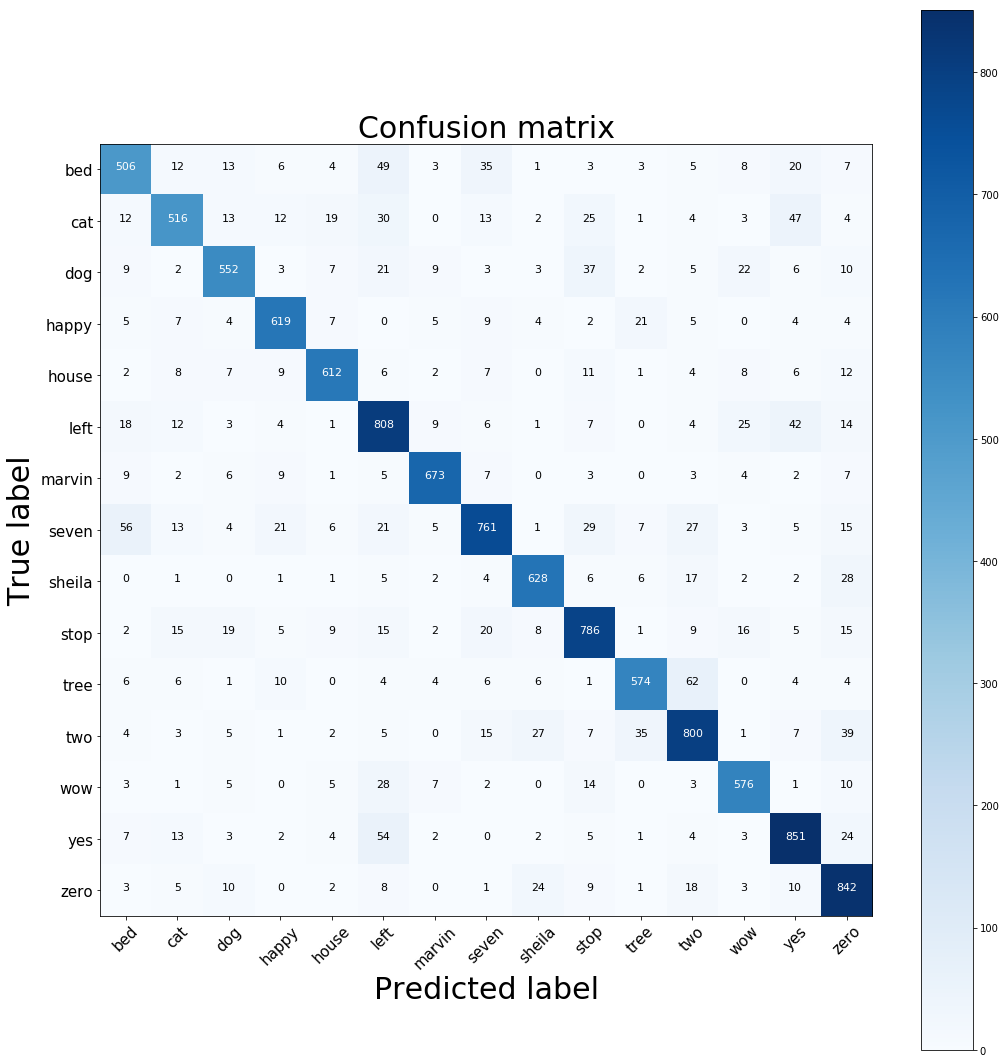

In [35]:
y_predict = model.predict(X_test)
confusionMatrixChart.plot_confusion_matrix(confusion_matrix(y_test, np.argmax(y_predict,1)),labels, normalize=False)

In [36]:
import random
index=random.randint(0,len(X_test)-1)
samples=X_test[index]
print('actual: {}'.format(labels[int(y_test[index])]))
print('predicted: {}'.format(labels[np.argmax(y_predict,1)[index]]))

actual: marvin
predicted: marvin


# 2 layer convolution with dropout

In [38]:
model = Sequential()
model.add(
    Conv2D(32, (3, 3), input_shape=(config.buckets, config.max_len, channels), activation='relu'))
model.add(
    Conv2D(32, (3, 3), input_shape=(config.buckets, config.max_len, channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [39]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [40]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Train on 17926 samples, validate on 11952 samples
Epoch 1/30
17926/17926 [==============================] - ETA: 1:55 - loss: 13.6014 - accuracy: 0.062 - ETA: 35s - loss: 10.3216 - accuracy: 0.085 - ETA: 19s - loss: 8.1863 - accuracy: 0.0868 - ETA: 14s - loss: 6.6088 - accuracy: 0.104 - ETA: 11s - loss: 5.5177 - accuracy: 0.104 - ETA: 10s - loss: 4.9785 - accuracy: 0.103 - ETA: 9s - loss: 4.6101 - accuracy: 0.103 - ETA: 8s - loss: 4.2925 - accuracy: 0.09 - ETA: 7s - loss: 4.0657 - accuracy: 0.09 - ETA: 7s - loss: 3.8851 - accuracy: 0.09 - ETA: 7s - loss: 3.7487 - accuracy: 0.09 - ETA: 6s - loss: 3.6539 - accuracy: 0.10 - ETA: 6s - loss: 3.5871 - accuracy: 0.10 - ETA: 6s - loss: 3.5566 - accuracy: 0.10 - ETA: 6s - loss: 3.4998 - accuracy: 0.10 - ETA: 6s - loss: 3.4512 - accuracy: 0.11 - ETA: 6s - loss: 3.3899 - accuracy: 0.11 - ETA: 6s - loss: 3.3457 - accuracy: 0.11 - ETA: 6s - loss: 3.3009 - accuracy: 0.11 - ETA: 6s - loss: 3.2689 - accuracy: 0.11 - ETA: 6s - loss: 3.2400 - accuracy: 

17926/17926 [==============================] - ETA: 5s - loss: 0.8178 - accuracy: 0.71 - ETA: 5s - loss: 1.1272 - accuracy: 0.63 - ETA: 5s - loss: 0.9740 - accuracy: 0.69 - ETA: 5s - loss: 1.0285 - accuracy: 0.67 - ETA: 5s - loss: 1.0225 - accuracy: 0.66 - ETA: 5s - loss: 1.0156 - accuracy: 0.67 - ETA: 5s - loss: 0.9843 - accuracy: 0.68 - ETA: 5s - loss: 0.9957 - accuracy: 0.68 - ETA: 5s - loss: 0.9887 - accuracy: 0.68 - ETA: 5s - loss: 0.9828 - accuracy: 0.68 - ETA: 5s - loss: 0.9792 - accuracy: 0.68 - ETA: 5s - loss: 0.9855 - accuracy: 0.68 - ETA: 5s - loss: 0.9767 - accuracy: 0.69 - ETA: 5s - loss: 0.9663 - accuracy: 0.69 - ETA: 5s - loss: 0.9627 - accuracy: 0.69 - ETA: 5s - loss: 0.9599 - accuracy: 0.69 - ETA: 5s - loss: 0.9561 - accuracy: 0.69 - ETA: 5s - loss: 0.9449 - accuracy: 0.70 - ETA: 5s - loss: 0.9479 - accuracy: 0.70 - ETA: 5s - loss: 0.9465 - accuracy: 0.70 - ETA: 5s - loss: 0.9452 - accuracy: 0.70 - ETA: 5s - loss: 0.9505 - accuracy: 0.70 - ETA: 5s - loss: 0.9448 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.4913 - accuracy: 0.81 - ETA: 5s - loss: 0.8329 - accuracy: 0.73 - ETA: 5s - loss: 0.7875 - accuracy: 0.75 - ETA: 5s - loss: 0.7898 - accuracy: 0.74 - ETA: 5s - loss: 0.7759 - accuracy: 0.75 - ETA: 5s - loss: 0.7523 - accuracy: 0.76 - ETA: 5s - loss: 0.7217 - accuracy: 0.76 - ETA: 5s - loss: 0.7310 - accuracy: 0.76 - ETA: 4s - loss: 0.7237 - accuracy: 0.77 - ETA: 4s - loss: 0.7139 - accuracy: 0.77 - ETA: 4s - loss: 0.7034 - accuracy: 0.77 - ETA: 5s - loss: 0.7119 - accuracy: 0.77 - ETA: 5s - loss: 0.7030 - accuracy: 0.78 - ETA: 5s - loss: 0.7045 - accuracy: 0.77 - ETA: 4s - loss: 0.6994 - accuracy: 0.78 - ETA: 4s - loss: 0.6992 - accuracy: 0.77 - ETA: 5s - loss: 0.7007 - accuracy: 0.77 - ETA: 5s - loss: 0.7026 - accuracy: 0.77 - ETA: 5s - loss: 0.7007 - accuracy: 0.77 - ETA: 5s - loss: 0.7002 - accuracy: 0.77 - ETA: 5s - loss: 0.6968 - accuracy: 0.77 - ETA: 5s - loss: 0.6935 - accuracy: 0.77 - ETA: 5s - loss: 0.7059 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.4138 - accuracy: 0.90 - ETA: 7s - loss: 0.6472 - accuracy: 0.78 - ETA: 8s - loss: 0.6109 - accuracy: 0.79 - ETA: 9s - loss: 0.6088 - accuracy: 0.79 - ETA: 9s - loss: 0.5997 - accuracy: 0.79 - ETA: 9s - loss: 0.5748 - accuracy: 0.80 - ETA: 9s - loss: 0.5717 - accuracy: 0.81 - ETA: 9s - loss: 0.5720 - accuracy: 0.81 - ETA: 9s - loss: 0.5506 - accuracy: 0.82 - ETA: 9s - loss: 0.5430 - accuracy: 0.82 - ETA: 9s - loss: 0.5578 - accuracy: 0.82 - ETA: 8s - loss: 0.5734 - accuracy: 0.81 - ETA: 8s - loss: 0.5735 - accuracy: 0.81 - ETA: 8s - loss: 0.5735 - accuracy: 0.81 - ETA: 8s - loss: 0.5700 - accuracy: 0.81 - ETA: 7s - loss: 0.5871 - accuracy: 0.80 - ETA: 7s - loss: 0.5782 - accuracy: 0.81 - ETA: 7s - loss: 0.5731 - accuracy: 0.80 - ETA: 7s - loss: 0.5720 - accuracy: 0.80 - ETA: 7s - loss: 0.5729 - accuracy: 0.81 - ETA: 7s - loss: 0.5673 - accuracy: 0.81 - ETA: 6s - loss: 0.5770 - accuracy: 0.80 - ETA: 6s - loss: 0.5780 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.4403 - accuracy: 0.81 - ETA: 6s - loss: 0.4897 - accuracy: 0.81 - ETA: 5s - loss: 0.4947 - accuracy: 0.83 - ETA: 5s - loss: 0.5138 - accuracy: 0.83 - ETA: 5s - loss: 0.5122 - accuracy: 0.84 - ETA: 5s - loss: 0.5123 - accuracy: 0.84 - ETA: 5s - loss: 0.5037 - accuracy: 0.84 - ETA: 5s - loss: 0.4966 - accuracy: 0.84 - ETA: 5s - loss: 0.4819 - accuracy: 0.84 - ETA: 5s - loss: 0.4828 - accuracy: 0.84 - ETA: 5s - loss: 0.4836 - accuracy: 0.84 - ETA: 5s - loss: 0.4790 - accuracy: 0.84 - ETA: 5s - loss: 0.4725 - accuracy: 0.84 - ETA: 5s - loss: 0.4747 - accuracy: 0.84 - ETA: 5s - loss: 0.4712 - accuracy: 0.84 - ETA: 5s - loss: 0.4728 - accuracy: 0.84 - ETA: 6s - loss: 0.4732 - accuracy: 0.84 - ETA: 6s - loss: 0.4668 - accuracy: 0.84 - ETA: 6s - loss: 0.4714 - accuracy: 0.84 - ETA: 6s - loss: 0.4701 - accuracy: 0.84 - ETA: 6s - loss: 0.4652 - accuracy: 0.84 - ETA: 6s - loss: 0.4633 - accuracy: 0.84 - ETA: 6s - loss: 0.4603 - accu

17926/17926 [==============================] - ETA: 7s - loss: 0.2095 - accuracy: 0.93 - ETA: 8s - loss: 0.4055 - accuracy: 0.84 - ETA: 8s - loss: 0.3998 - accuracy: 0.85 - ETA: 8s - loss: 0.4412 - accuracy: 0.83 - ETA: 8s - loss: 0.4246 - accuracy: 0.84 - ETA: 7s - loss: 0.4529 - accuracy: 0.83 - ETA: 7s - loss: 0.4280 - accuracy: 0.84 - ETA: 7s - loss: 0.4315 - accuracy: 0.84 - ETA: 7s - loss: 0.4185 - accuracy: 0.85 - ETA: 7s - loss: 0.4270 - accuracy: 0.85 - ETA: 6s - loss: 0.4217 - accuracy: 0.85 - ETA: 6s - loss: 0.4143 - accuracy: 0.85 - ETA: 6s - loss: 0.4142 - accuracy: 0.85 - ETA: 6s - loss: 0.4175 - accuracy: 0.85 - ETA: 6s - loss: 0.4234 - accuracy: 0.85 - ETA: 6s - loss: 0.4188 - accuracy: 0.85 - ETA: 6s - loss: 0.4278 - accuracy: 0.85 - ETA: 6s - loss: 0.4369 - accuracy: 0.85 - ETA: 6s - loss: 0.4354 - accuracy: 0.85 - ETA: 6s - loss: 0.4348 - accuracy: 0.85 - ETA: 7s - loss: 0.4355 - accuracy: 0.85 - ETA: 7s - loss: 0.4353 - accuracy: 0.85 - ETA: 7s - loss: 0.4367 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.5026 - accuracy: 0.90 - ETA: 7s - loss: 0.3758 - accuracy: 0.86 - ETA: 8s - loss: 0.4447 - accuracy: 0.84 - ETA: 8s - loss: 0.4494 - accuracy: 0.84 - ETA: 8s - loss: 0.4492 - accuracy: 0.84 - ETA: 8s - loss: 0.4407 - accuracy: 0.85 - ETA: 7s - loss: 0.4676 - accuracy: 0.85 - ETA: 7s - loss: 0.4471 - accuracy: 0.85 - ETA: 7s - loss: 0.4521 - accuracy: 0.85 - ETA: 6s - loss: 0.4598 - accuracy: 0.85 - ETA: 6s - loss: 0.4605 - accuracy: 0.85 - ETA: 6s - loss: 0.4669 - accuracy: 0.84 - ETA: 6s - loss: 0.4551 - accuracy: 0.85 - ETA: 6s - loss: 0.4556 - accuracy: 0.85 - ETA: 6s - loss: 0.4435 - accuracy: 0.85 - ETA: 6s - loss: 0.4428 - accuracy: 0.85 - ETA: 6s - loss: 0.4447 - accuracy: 0.85 - ETA: 6s - loss: 0.4458 - accuracy: 0.85 - ETA: 5s - loss: 0.4382 - accuracy: 0.85 - ETA: 5s - loss: 0.4347 - accuracy: 0.86 - ETA: 5s - loss: 0.4413 - accuracy: 0.85 - ETA: 5s - loss: 0.4373 - accuracy: 0.85 - ETA: 5s - loss: 0.4363 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.1578 - accuracy: 0.90 - ETA: 5s - loss: 0.3488 - accuracy: 0.87 - ETA: 4s - loss: 0.3980 - accuracy: 0.85 - ETA: 4s - loss: 0.3931 - accuracy: 0.86 - ETA: 4s - loss: 0.3726 - accuracy: 0.86 - ETA: 4s - loss: 0.3788 - accuracy: 0.86 - ETA: 4s - loss: 0.3807 - accuracy: 0.86 - ETA: 4s - loss: 0.3685 - accuracy: 0.87 - ETA: 4s - loss: 0.3663 - accuracy: 0.87 - ETA: 4s - loss: 0.3725 - accuracy: 0.86 - ETA: 4s - loss: 0.3871 - accuracy: 0.86 - ETA: 4s - loss: 0.3884 - accuracy: 0.86 - ETA: 4s - loss: 0.3847 - accuracy: 0.86 - ETA: 4s - loss: 0.3807 - accuracy: 0.86 - ETA: 4s - loss: 0.3849 - accuracy: 0.86 - ETA: 4s - loss: 0.3888 - accuracy: 0.86 - ETA: 4s - loss: 0.3860 - accuracy: 0.86 - ETA: 4s - loss: 0.3854 - accuracy: 0.86 - ETA: 4s - loss: 0.3898 - accuracy: 0.86 - ETA: 4s - loss: 0.3908 - accuracy: 0.86 - ETA: 4s - loss: 0.3913 - accuracy: 0.86 - ETA: 4s - loss: 0.3930 - accuracy: 0.86 - ETA: 4s - loss: 0.3895 - accu

17926/17926 [==============================] - ETA: 5s - loss: 0.5889 - accuracy: 0.84 - ETA: 4s - loss: 0.3784 - accuracy: 0.87 - ETA: 4s - loss: 0.3463 - accuracy: 0.88 - ETA: 4s - loss: 0.3396 - accuracy: 0.88 - ETA: 4s - loss: 0.3563 - accuracy: 0.87 - ETA: 4s - loss: 0.3585 - accuracy: 0.87 - ETA: 4s - loss: 0.3518 - accuracy: 0.87 - ETA: 4s - loss: 0.3366 - accuracy: 0.88 - ETA: 4s - loss: 0.3238 - accuracy: 0.88 - ETA: 4s - loss: 0.3247 - accuracy: 0.88 - ETA: 5s - loss: 0.3289 - accuracy: 0.88 - ETA: 5s - loss: 0.3390 - accuracy: 0.88 - ETA: 5s - loss: 0.3314 - accuracy: 0.88 - ETA: 4s - loss: 0.3330 - accuracy: 0.88 - ETA: 4s - loss: 0.3430 - accuracy: 0.88 - ETA: 4s - loss: 0.3365 - accuracy: 0.88 - ETA: 4s - loss: 0.3368 - accuracy: 0.88 - ETA: 4s - loss: 0.3375 - accuracy: 0.88 - ETA: 4s - loss: 0.3444 - accuracy: 0.88 - ETA: 4s - loss: 0.3453 - accuracy: 0.87 - ETA: 4s - loss: 0.3492 - accuracy: 0.87 - ETA: 4s - loss: 0.3450 - accuracy: 0.87 - ETA: 4s - loss: 0.3432 - accu

17926/17926 [==============================] - ETA: 5s - loss: 0.1626 - accuracy: 0.93 - ETA: 5s - loss: 0.3321 - accuracy: 0.85 - ETA: 5s - loss: 0.3101 - accuracy: 0.88 - ETA: 5s - loss: 0.3502 - accuracy: 0.87 - ETA: 5s - loss: 0.3487 - accuracy: 0.87 - ETA: 5s - loss: 0.3336 - accuracy: 0.88 - ETA: 5s - loss: 0.3477 - accuracy: 0.88 - ETA: 5s - loss: 0.3344 - accuracy: 0.88 - ETA: 5s - loss: 0.3393 - accuracy: 0.88 - ETA: 5s - loss: 0.3477 - accuracy: 0.88 - ETA: 4s - loss: 0.3433 - accuracy: 0.88 - ETA: 4s - loss: 0.3400 - accuracy: 0.88 - ETA: 4s - loss: 0.3453 - accuracy: 0.88 - ETA: 4s - loss: 0.3564 - accuracy: 0.88 - ETA: 4s - loss: 0.3569 - accuracy: 0.88 - ETA: 4s - loss: 0.3551 - accuracy: 0.88 - ETA: 4s - loss: 0.3558 - accuracy: 0.88 - ETA: 4s - loss: 0.3538 - accuracy: 0.88 - ETA: 4s - loss: 0.3505 - accuracy: 0.88 - ETA: 4s - loss: 0.3499 - accuracy: 0.88 - ETA: 4s - loss: 0.3482 - accuracy: 0.88 - ETA: 4s - loss: 0.3433 - accuracy: 0.88 - ETA: 4s - loss: 0.3451 - accu

17926/17926 [==============================] - ETA: 5s - loss: 0.0479 - accuracy: 1.00 - ETA: 5s - loss: 0.1883 - accuracy: 0.93 - ETA: 5s - loss: 0.2216 - accuracy: 0.93 - ETA: 6s - loss: 0.2472 - accuracy: 0.91 - ETA: 6s - loss: 0.2557 - accuracy: 0.90 - ETA: 7s - loss: 0.2640 - accuracy: 0.90 - ETA: 7s - loss: 0.2831 - accuracy: 0.90 - ETA: 6s - loss: 0.2975 - accuracy: 0.89 - ETA: 6s - loss: 0.3048 - accuracy: 0.89 - ETA: 6s - loss: 0.3109 - accuracy: 0.89 - ETA: 6s - loss: 0.3135 - accuracy: 0.89 - ETA: 6s - loss: 0.3182 - accuracy: 0.89 - ETA: 6s - loss: 0.3166 - accuracy: 0.89 - ETA: 5s - loss: 0.3120 - accuracy: 0.89 - ETA: 5s - loss: 0.3116 - accuracy: 0.89 - ETA: 5s - loss: 0.3136 - accuracy: 0.89 - ETA: 5s - loss: 0.3075 - accuracy: 0.89 - ETA: 5s - loss: 0.3082 - accuracy: 0.89 - ETA: 5s - loss: 0.3082 - accuracy: 0.89 - ETA: 5s - loss: 0.3144 - accuracy: 0.89 - ETA: 5s - loss: 0.3160 - accuracy: 0.89 - ETA: 5s - loss: 0.3150 - accuracy: 0.89 - ETA: 5s - loss: 0.3209 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.2198 - accuracy: 0.90 - ETA: 6s - loss: 0.3449 - accuracy: 0.91 - ETA: 7s - loss: 0.3606 - accuracy: 0.90 - ETA: 7s - loss: 0.3857 - accuracy: 0.88 - ETA: 7s - loss: 0.3887 - accuracy: 0.88 - ETA: 6s - loss: 0.4039 - accuracy: 0.87 - ETA: 6s - loss: 0.3800 - accuracy: 0.88 - ETA: 6s - loss: 0.3584 - accuracy: 0.88 - ETA: 6s - loss: 0.3517 - accuracy: 0.88 - ETA: 6s - loss: 0.3555 - accuracy: 0.88 - ETA: 6s - loss: 0.3387 - accuracy: 0.88 - ETA: 5s - loss: 0.3367 - accuracy: 0.89 - ETA: 5s - loss: 0.3400 - accuracy: 0.88 - ETA: 5s - loss: 0.3303 - accuracy: 0.89 - ETA: 5s - loss: 0.3308 - accuracy: 0.88 - ETA: 5s - loss: 0.3351 - accuracy: 0.88 - ETA: 5s - loss: 0.3417 - accuracy: 0.88 - ETA: 5s - loss: 0.3435 - accuracy: 0.88 - ETA: 5s - loss: 0.3424 - accuracy: 0.88 - ETA: 5s - loss: 0.3417 - accuracy: 0.88 - ETA: 5s - loss: 0.3424 - accuracy: 0.88 - ETA: 5s - loss: 0.3379 - accuracy: 0.88 - ETA: 5s - loss: 0.3402 - accu

17926/17926 [==============================] - ETA: 5s - loss: 0.1907 - accuracy: 0.93 - ETA: 4s - loss: 0.2450 - accuracy: 0.91 - ETA: 4s - loss: 0.2717 - accuracy: 0.90 - ETA: 4s - loss: 0.2748 - accuracy: 0.89 - ETA: 4s - loss: 0.2785 - accuracy: 0.89 - ETA: 4s - loss: 0.2815 - accuracy: 0.89 - ETA: 4s - loss: 0.3010 - accuracy: 0.88 - ETA: 4s - loss: 0.3118 - accuracy: 0.88 - ETA: 4s - loss: 0.3076 - accuracy: 0.88 - ETA: 4s - loss: 0.3200 - accuracy: 0.88 - ETA: 4s - loss: 0.3268 - accuracy: 0.88 - ETA: 4s - loss: 0.3323 - accuracy: 0.88 - ETA: 4s - loss: 0.3271 - accuracy: 0.88 - ETA: 4s - loss: 0.3309 - accuracy: 0.88 - ETA: 4s - loss: 0.3289 - accuracy: 0.88 - ETA: 4s - loss: 0.3237 - accuracy: 0.88 - ETA: 4s - loss: 0.3159 - accuracy: 0.88 - ETA: 4s - loss: 0.3178 - accuracy: 0.88 - ETA: 5s - loss: 0.3178 - accuracy: 0.88 - ETA: 5s - loss: 0.3171 - accuracy: 0.88 - ETA: 5s - loss: 0.3174 - accuracy: 0.88 - ETA: 5s - loss: 0.3125 - accuracy: 0.89 - ETA: 5s - loss: 0.3102 - accu

17926/17926 [==============================] - ETA: 6s - loss: 0.0369 - accuracy: 1.00 - ETA: 5s - loss: 0.2549 - accuracy: 0.91 - ETA: 5s - loss: 0.2792 - accuracy: 0.90 - ETA: 5s - loss: 0.2783 - accuracy: 0.90 - ETA: 5s - loss: 0.3021 - accuracy: 0.89 - ETA: 5s - loss: 0.2886 - accuracy: 0.90 - ETA: 5s - loss: 0.2734 - accuracy: 0.90 - ETA: 5s - loss: 0.2735 - accuracy: 0.90 - ETA: 5s - loss: 0.2666 - accuracy: 0.91 - ETA: 5s - loss: 0.2735 - accuracy: 0.90 - ETA: 5s - loss: 0.2703 - accuracy: 0.90 - ETA: 5s - loss: 0.2640 - accuracy: 0.90 - ETA: 5s - loss: 0.2648 - accuracy: 0.91 - ETA: 6s - loss: 0.2632 - accuracy: 0.91 - ETA: 6s - loss: 0.2599 - accuracy: 0.91 - ETA: 6s - loss: 0.2569 - accuracy: 0.91 - ETA: 6s - loss: 0.2582 - accuracy: 0.91 - ETA: 6s - loss: 0.2538 - accuracy: 0.91 - ETA: 6s - loss: 0.2579 - accuracy: 0.91 - ETA: 6s - loss: 0.2542 - accuracy: 0.91 - ETA: 6s - loss: 0.2514 - accuracy: 0.91 - ETA: 5s - loss: 0.2519 - accuracy: 0.91 - ETA: 5s - loss: 0.2540 - accu

17926/17926 [==============================] - ETA: 7s - loss: 0.4827 - accuracy: 0.87 - ETA: 5s - loss: 0.3761 - accuracy: 0.86 - ETA: 5s - loss: 0.3379 - accuracy: 0.87 - ETA: 5s - loss: 0.3148 - accuracy: 0.89 - ETA: 5s - loss: 0.3103 - accuracy: 0.88 - ETA: 5s - loss: 0.3136 - accuracy: 0.89 - ETA: 5s - loss: 0.2935 - accuracy: 0.89 - ETA: 5s - loss: 0.2997 - accuracy: 0.89 - ETA: 5s - loss: 0.2999 - accuracy: 0.89 - ETA: 5s - loss: 0.3034 - accuracy: 0.89 - ETA: 5s - loss: 0.3072 - accuracy: 0.89 - ETA: 5s - loss: 0.3111 - accuracy: 0.89 - ETA: 5s - loss: 0.3158 - accuracy: 0.89 - ETA: 5s - loss: 0.3107 - accuracy: 0.89 - ETA: 5s - loss: 0.3096 - accuracy: 0.89 - ETA: 5s - loss: 0.3086 - accuracy: 0.89 - ETA: 5s - loss: 0.3070 - accuracy: 0.89 - ETA: 5s - loss: 0.2975 - accuracy: 0.89 - ETA: 4s - loss: 0.3030 - accuracy: 0.89 - ETA: 4s - loss: 0.2987 - accuracy: 0.89 - ETA: 4s - loss: 0.2974 - accuracy: 0.90 - ETA: 4s - loss: 0.3012 - accuracy: 0.90 - ETA: 4s - loss: 0.2971 - accu

wandb: ERROR Error uploading "media/images/examples_22.png": CommError, File C:\Users\Lenovo\OneDrive\Desktop\speech recogniton new\wandb\run-20200608_123209-22nl8o4g\media\images\examples_22.png size shrank from 8966 to 0 while it was being uploaded.


# Confusion Matrix

Confusion matrix, without normalization


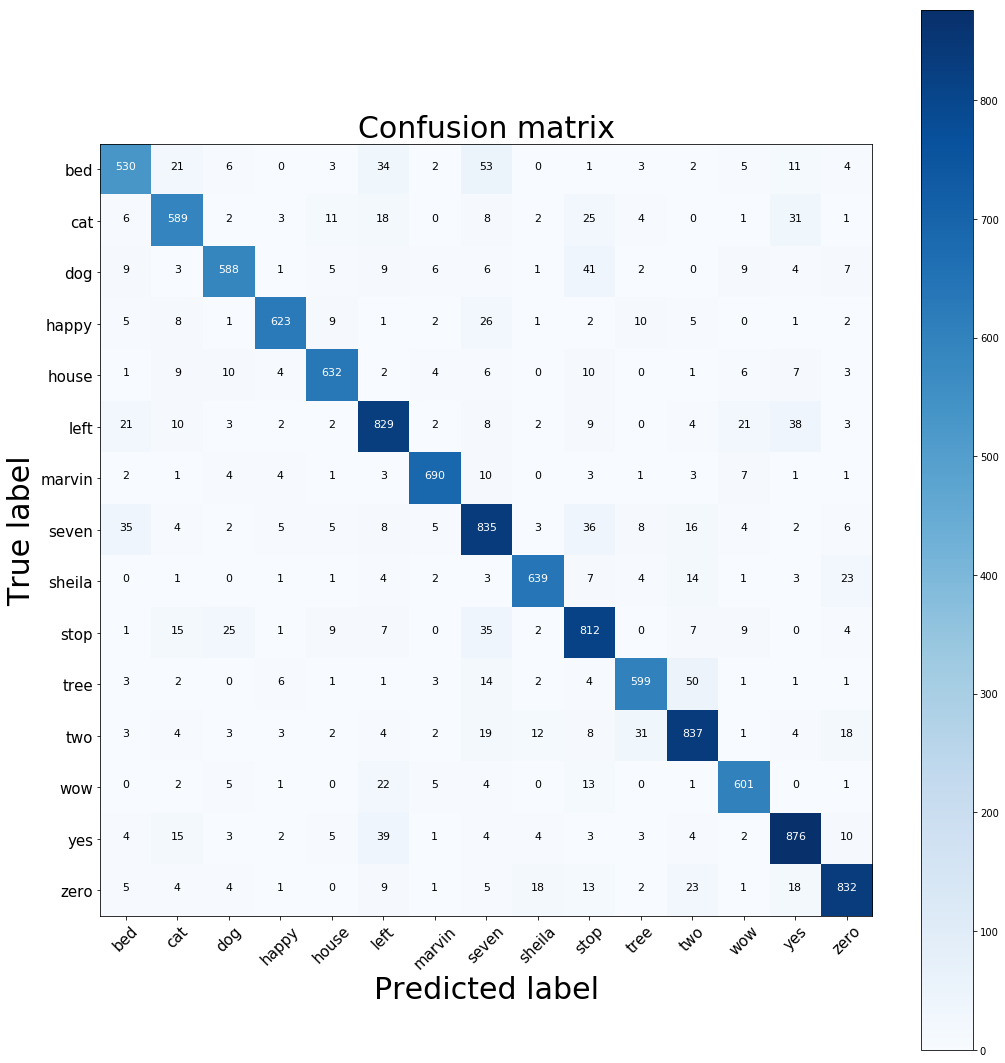

In [108]:
y_predict = model.predict(X_test)
confusionMatrixChart.plot_confusion_matrix(confusion_matrix(y_test, np.argmax(y_predict,1)),labels, normalize=False)

In [37]:
import random
index=random.randint(0,len(X_test)-1)
samples=X_test[index]
print('actual: {}'.format(labels[int(y_test[index])]))
print('predicted: {}'.format(labels[np.argmax(y_predict,1)[index]]))

actual: yes
predicted: yes


wandb: ERROR Error uploading "model-best.h5": CommError, File C:\Users\Lenovo\OneDrive\Desktop\speech recogniton new\wandb\run-20200608_114627-3n6gturl\model-best.h5 size shrank from 1353100 to 1262988 while it was being uploaded.


# LSTM

In [113]:
X_train, X_test, y_train, y_test = get_train_test()

In [114]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

In [115]:
model = Sequential()
model.add(LSTM(16, input_shape=(config.buckets, config.max_len), activation="sigmoid"))
model.add(Dense(1, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [116]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [117]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Train on 17926 samples, validate on 11952 samples
Epoch 1/30
17926/17926 [==============================] - ETA: 3:37 - loss: 2.7174 - accuracy: 0.03 - ETA: 35s - loss: 2.7027 - accuracy: 0.0491 - ETA: 18s - loss: 2.7093 - accuracy: 0.058 - ETA: 12s - loss: 2.7097 - accuracy: 0.066 - ETA: 10s - loss: 2.7077 - accuracy: 0.066 - ETA: 9s - loss: 2.7081 - accuracy: 0.071 - ETA: 8s - loss: 2.7078 - accuracy: 0.07 - ETA: 7s - loss: 2.7089 - accuracy: 0.07 - ETA: 6s - loss: 2.7078 - accuracy: 0.07 - ETA: 6s - loss: 2.7071 - accuracy: 0.07 - ETA: 6s - loss: 2.7080 - accuracy: 0.07 - ETA: 5s - loss: 2.7084 - accuracy: 0.06 - ETA: 5s - loss: 2.7075 - accuracy: 0.06 - ETA: 5s - loss: 2.7078 - accuracy: 0.06 - ETA: 5s - loss: 2.7082 - accuracy: 0.07 - ETA: 5s - loss: 2.7082 - accuracy: 0.07 - ETA: 5s - loss: 2.7080 - accuracy: 0.07 - ETA: 4s - loss: 2.7083 - accuracy: 0.07 - ETA: 4s - loss: 2.7079 - accuracy: 0.07 - ETA: 4s - loss: 2.7082 - accuracy: 0.07 - ETA: 4s - loss: 2.7077 - accuracy: 0.07 

17926/17926 [==============================] - ETA: 4s - loss: 2.6553 - accuracy: 0.06 - ETA: 4s - loss: 2.6751 - accuracy: 0.09 - ETA: 4s - loss: 2.6904 - accuracy: 0.08 - ETA: 4s - loss: 2.6857 - accuracy: 0.08 - ETA: 4s - loss: 2.6827 - accuracy: 0.09 - ETA: 4s - loss: 2.6853 - accuracy: 0.08 - ETA: 4s - loss: 2.6886 - accuracy: 0.08 - ETA: 4s - loss: 2.6888 - accuracy: 0.08 - ETA: 4s - loss: 2.6888 - accuracy: 0.08 - ETA: 4s - loss: 2.6895 - accuracy: 0.08 - ETA: 4s - loss: 2.6889 - accuracy: 0.08 - ETA: 4s - loss: 2.6896 - accuracy: 0.08 - ETA: 4s - loss: 2.6880 - accuracy: 0.08 - ETA: 4s - loss: 2.6883 - accuracy: 0.08 - ETA: 4s - loss: 2.6882 - accuracy: 0.08 - ETA: 4s - loss: 2.6891 - accuracy: 0.08 - ETA: 4s - loss: 2.6888 - accuracy: 0.08 - ETA: 4s - loss: 2.6880 - accuracy: 0.08 - ETA: 3s - loss: 2.6885 - accuracy: 0.08 - ETA: 3s - loss: 2.6888 - accuracy: 0.08 - ETA: 3s - loss: 2.6890 - accuracy: 0.08 - ETA: 3s - loss: 2.6892 - accuracy: 0.08 - ETA: 3s - loss: 2.6901 - accu

17926/17926 [==============================] - ETA: 4s - loss: 2.6532 - accuracy: 0.09 - ETA: 5s - loss: 2.6493 - accuracy: 0.14 - ETA: 5s - loss: 2.6596 - accuracy: 0.12 - ETA: 5s - loss: 2.6599 - accuracy: 0.12 - ETA: 5s - loss: 2.6599 - accuracy: 0.11 - ETA: 5s - loss: 2.6585 - accuracy: 0.11 - ETA: 4s - loss: 2.6610 - accuracy: 0.11 - ETA: 4s - loss: 2.6558 - accuracy: 0.11 - ETA: 4s - loss: 2.6513 - accuracy: 0.11 - ETA: 4s - loss: 2.6507 - accuracy: 0.11 - ETA: 4s - loss: 2.6482 - accuracy: 0.11 - ETA: 4s - loss: 2.6505 - accuracy: 0.11 - ETA: 4s - loss: 2.6521 - accuracy: 0.11 - ETA: 5s - loss: 2.6528 - accuracy: 0.11 - ETA: 5s - loss: 2.6535 - accuracy: 0.11 - ETA: 5s - loss: 2.6546 - accuracy: 0.11 - ETA: 5s - loss: 2.6552 - accuracy: 0.11 - ETA: 5s - loss: 2.6542 - accuracy: 0.11 - ETA: 4s - loss: 2.6554 - accuracy: 0.11 - ETA: 4s - loss: 2.6552 - accuracy: 0.10 - ETA: 4s - loss: 2.6561 - accuracy: 0.10 - ETA: 4s - loss: 2.6566 - accuracy: 0.10 - ETA: 4s - loss: 2.6570 - accu

17926/17926 [==============================] - ETA: 3s - loss: 2.5239 - accuracy: 0.12 - ETA: 4s - loss: 2.5555 - accuracy: 0.14 - ETA: 4s - loss: 2.5632 - accuracy: 0.14 - ETA: 4s - loss: 2.5753 - accuracy: 0.14 - ETA: 4s - loss: 2.5798 - accuracy: 0.13 - ETA: 4s - loss: 2.5702 - accuracy: 0.14 - ETA: 4s - loss: 2.5601 - accuracy: 0.14 - ETA: 4s - loss: 2.5627 - accuracy: 0.13 - ETA: 4s - loss: 2.5661 - accuracy: 0.13 - ETA: 4s - loss: 2.5607 - accuracy: 0.13 - ETA: 4s - loss: 2.5601 - accuracy: 0.13 - ETA: 3s - loss: 2.5635 - accuracy: 0.13 - ETA: 3s - loss: 2.5602 - accuracy: 0.13 - ETA: 3s - loss: 2.5601 - accuracy: 0.13 - ETA: 3s - loss: 2.5584 - accuracy: 0.13 - ETA: 3s - loss: 2.5588 - accuracy: 0.13 - ETA: 3s - loss: 2.5588 - accuracy: 0.13 - ETA: 3s - loss: 2.5564 - accuracy: 0.13 - ETA: 3s - loss: 2.5583 - accuracy: 0.13 - ETA: 3s - loss: 2.5603 - accuracy: 0.13 - ETA: 3s - loss: 2.5602 - accuracy: 0.13 - ETA: 3s - loss: 2.5606 - accuracy: 0.13 - ETA: 3s - loss: 2.5603 - accu

17926/17926 [==============================] - ETA: 3s - loss: 2.5295 - accuracy: 0.12 - ETA: 3s - loss: 2.4782 - accuracy: 0.15 - ETA: 3s - loss: 2.4663 - accuracy: 0.13 - ETA: 3s - loss: 2.4896 - accuracy: 0.12 - ETA: 3s - loss: 2.4952 - accuracy: 0.12 - ETA: 3s - loss: 2.4897 - accuracy: 0.12 - ETA: 3s - loss: 2.4988 - accuracy: 0.11 - ETA: 3s - loss: 2.5017 - accuracy: 0.11 - ETA: 3s - loss: 2.5002 - accuracy: 0.12 - ETA: 3s - loss: 2.5024 - accuracy: 0.12 - ETA: 3s - loss: 2.5040 - accuracy: 0.12 - ETA: 3s - loss: 2.5016 - accuracy: 0.12 - ETA: 3s - loss: 2.4992 - accuracy: 0.12 - ETA: 3s - loss: 2.4971 - accuracy: 0.12 - ETA: 3s - loss: 2.4888 - accuracy: 0.13 - ETA: 3s - loss: 2.4839 - accuracy: 0.13 - ETA: 3s - loss: 2.4800 - accuracy: 0.13 - ETA: 3s - loss: 2.4809 - accuracy: 0.13 - ETA: 3s - loss: 2.4801 - accuracy: 0.13 - ETA: 3s - loss: 2.4768 - accuracy: 0.13 - ETA: 3s - loss: 2.4764 - accuracy: 0.13 - ETA: 3s - loss: 2.4774 - accuracy: 0.13 - ETA: 3s - loss: 2.4758 - accu

17926/17926 [==============================] - ETA: 4s - loss: 2.2792 - accuracy: 0.21 - ETA: 3s - loss: 2.4107 - accuracy: 0.14 - ETA: 3s - loss: 2.3864 - accuracy: 0.15 - ETA: 4s - loss: 2.4003 - accuracy: 0.15 - ETA: 4s - loss: 2.4244 - accuracy: 0.14 - ETA: 5s - loss: 2.4363 - accuracy: 0.14 - ETA: 5s - loss: 2.4270 - accuracy: 0.14 - ETA: 5s - loss: 2.4325 - accuracy: 0.14 - ETA: 5s - loss: 2.4307 - accuracy: 0.14 - ETA: 4s - loss: 2.4270 - accuracy: 0.14 - ETA: 4s - loss: 2.4280 - accuracy: 0.14 - ETA: 4s - loss: 2.4292 - accuracy: 0.13 - ETA: 4s - loss: 2.4280 - accuracy: 0.13 - ETA: 4s - loss: 2.4260 - accuracy: 0.13 - ETA: 4s - loss: 2.4269 - accuracy: 0.13 - ETA: 4s - loss: 2.4305 - accuracy: 0.13 - ETA: 4s - loss: 2.4346 - accuracy: 0.13 - ETA: 4s - loss: 2.4330 - accuracy: 0.13 - ETA: 4s - loss: 2.4285 - accuracy: 0.13 - ETA: 4s - loss: 2.4322 - accuracy: 0.13 - ETA: 4s - loss: 2.4282 - accuracy: 0.13 - ETA: 4s - loss: 2.4272 - accuracy: 0.14 - ETA: 4s - loss: 2.4230 - accu

17926/17926 [==============================] - ETA: 5s - loss: 2.4737 - accuracy: 0.15 - ETA: 4s - loss: 2.3894 - accuracy: 0.14 - ETA: 4s - loss: 2.3921 - accuracy: 0.15 - ETA: 4s - loss: 2.3993 - accuracy: 0.16 - ETA: 4s - loss: 2.3973 - accuracy: 0.16 - ETA: 4s - loss: 2.3854 - accuracy: 0.16 - ETA: 4s - loss: 2.3907 - accuracy: 0.16 - ETA: 4s - loss: 2.3895 - accuracy: 0.16 - ETA: 4s - loss: 2.3938 - accuracy: 0.15 - ETA: 4s - loss: 2.3888 - accuracy: 0.15 - ETA: 5s - loss: 2.3874 - accuracy: 0.15 - ETA: 5s - loss: 2.3931 - accuracy: 0.15 - ETA: 5s - loss: 2.3937 - accuracy: 0.15 - ETA: 5s - loss: 2.3966 - accuracy: 0.15 - ETA: 5s - loss: 2.3975 - accuracy: 0.15 - ETA: 5s - loss: 2.4003 - accuracy: 0.15 - ETA: 5s - loss: 2.4038 - accuracy: 0.15 - ETA: 5s - loss: 2.4042 - accuracy: 0.15 - ETA: 5s - loss: 2.4034 - accuracy: 0.15 - ETA: 5s - loss: 2.4042 - accuracy: 0.15 - ETA: 4s - loss: 2.4082 - accuracy: 0.15 - ETA: 4s - loss: 2.4096 - accuracy: 0.15 - ETA: 4s - loss: 2.4128 - accu

17926/17926 [==============================] - ETA: 4s - loss: 2.5537 - accuracy: 0.0000e+ - ETA: 3s - loss: 2.4073 - accuracy: 0.1250   - ETA: 3s - loss: 2.4297 - accuracy: 0.13 - ETA: 3s - loss: 2.3989 - accuracy: 0.14 - ETA: 3s - loss: 2.4146 - accuracy: 0.14 - ETA: 3s - loss: 2.4238 - accuracy: 0.15 - ETA: 3s - loss: 2.4170 - accuracy: 0.14 - ETA: 3s - loss: 2.4137 - accuracy: 0.14 - ETA: 3s - loss: 2.4055 - accuracy: 0.14 - ETA: 3s - loss: 2.3996 - accuracy: 0.14 - ETA: 3s - loss: 2.3988 - accuracy: 0.14 - ETA: 3s - loss: 2.3998 - accuracy: 0.14 - ETA: 3s - loss: 2.3966 - accuracy: 0.14 - ETA: 3s - loss: 2.3938 - accuracy: 0.15 - ETA: 3s - loss: 2.3976 - accuracy: 0.14 - ETA: 3s - loss: 2.3995 - accuracy: 0.15 - ETA: 3s - loss: 2.3929 - accuracy: 0.15 - ETA: 3s - loss: 2.3941 - accuracy: 0.15 - ETA: 3s - loss: 2.3958 - accuracy: 0.15 - ETA: 3s - loss: 2.3949 - accuracy: 0.15 - ETA: 3s - loss: 2.3965 - accuracy: 0.15 - ETA: 3s - loss: 2.3983 - accuracy: 0.15 - ETA: 3s - loss: 2.398

17926/17926 [==============================] - ETA: 3s - loss: 2.4741 - accuracy: 0.15 - ETA: 3s - loss: 2.3583 - accuracy: 0.16 - ETA: 3s - loss: 2.3826 - accuracy: 0.16 - ETA: 3s - loss: 2.3885 - accuracy: 0.15 - ETA: 3s - loss: 2.3667 - accuracy: 0.17 - ETA: 3s - loss: 2.3736 - accuracy: 0.17 - ETA: 3s - loss: 2.3741 - accuracy: 0.17 - ETA: 3s - loss: 2.3741 - accuracy: 0.17 - ETA: 3s - loss: 2.3806 - accuracy: 0.17 - ETA: 3s - loss: 2.3778 - accuracy: 0.17 - ETA: 3s - loss: 2.3752 - accuracy: 0.17 - ETA: 3s - loss: 2.3720 - accuracy: 0.17 - ETA: 3s - loss: 2.3702 - accuracy: 0.17 - ETA: 3s - loss: 2.3733 - accuracy: 0.17 - ETA: 3s - loss: 2.3763 - accuracy: 0.16 - ETA: 3s - loss: 2.3727 - accuracy: 0.16 - ETA: 3s - loss: 2.3722 - accuracy: 0.16 - ETA: 3s - loss: 2.3694 - accuracy: 0.16 - ETA: 3s - loss: 2.3708 - accuracy: 0.16 - ETA: 3s - loss: 2.3709 - accuracy: 0.16 - ETA: 3s - loss: 2.3752 - accuracy: 0.17 - ETA: 3s - loss: 2.3778 - accuracy: 0.16 - ETA: 3s - loss: 2.3765 - accu

# Confusion Matrix

Confusion matrix, without normalization


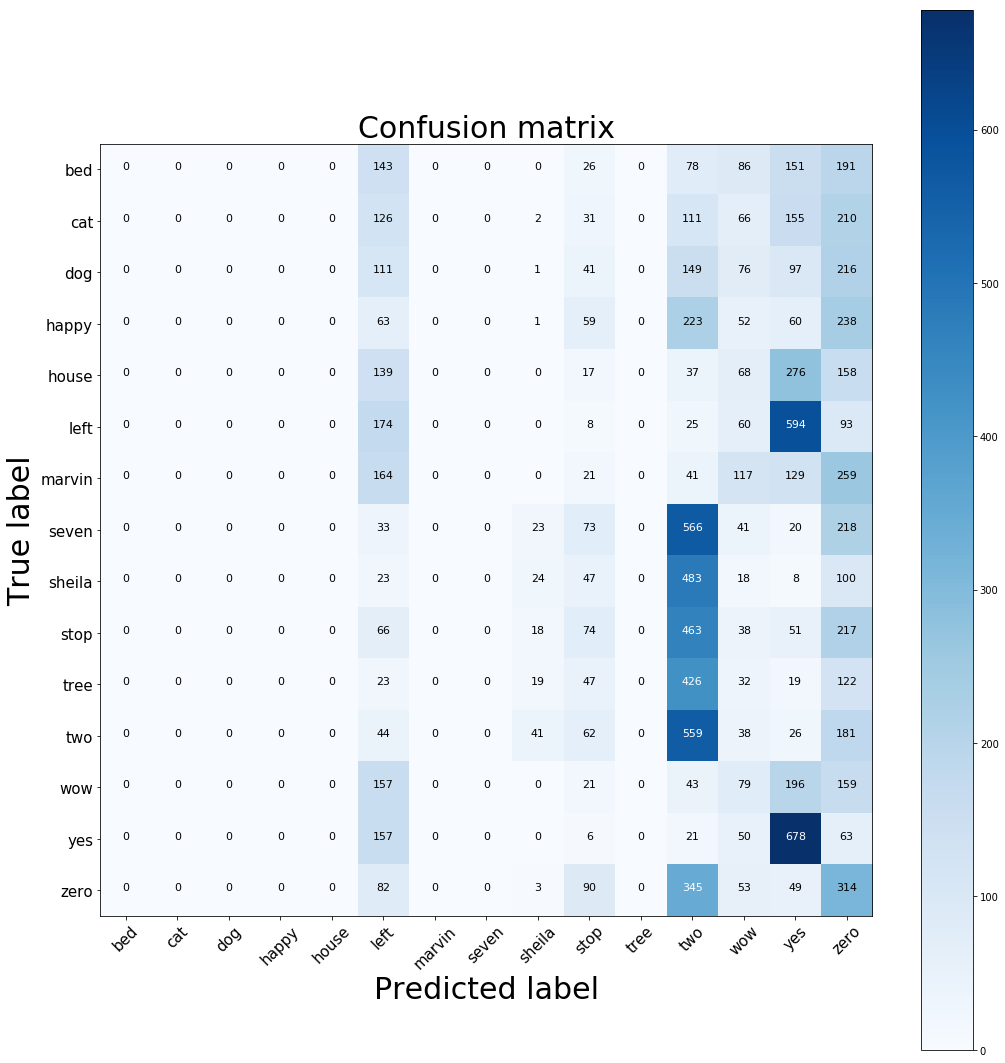

In [118]:
y_predict = model.predict(X_test)
confusionMatrixChart.plot_confusion_matrix(confusion_matrix(y_test, np.argmax(y_predict,1)),labels, normalize=False)

In [128]:
import random
index=random.randint(0,len(X_test)-1)
samples=X_test[index]
print('actual: {}'.format(labels[int(y_test[index])]))
print('predicted: {}'.format(labels[np.argmax(y_predict,1)[index]]))

actual: zero
predicted: two
